MDS: Intercity distances
===

Data mining: Dimensionality reduction  
Author: Steven Van Vaerenbergh  
Universidad de Cantabria  

Adapted from https://chrisalbon.com/python/data_wrangling/pandas_dataframe_importing_csv/

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
import pandas as pd

# Make the plot outputs appear and be stored within the notebook
%matplotlib inline

In [2]:
# Distance data available from RMDS project:
url = 'https://raw.githubusercontent.com/cheind/rmds/master/examples/european_city_distances.csv'
df = pd.read_csv(url,delimiter=';',header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Barcelona,0.00,1528.13,1497.61,1062.89,1968.42,1498.79,1757.54,1469.29,1471.78,...,1054.55,831.59,1353.90,856.69,2813.02,1745.55,2276.51,1347.43,1862.33,NaN
1,Belgrade,1528.13,0.00,999.25,1372.59,447.34,316.41,1327.24,2145.39,1229.93,...,773.33,1445.70,738.10,721.55,1797.75,329.46,1620.96,489.28,826.66,NaN
2,Berlin,1497.61,999.25,0.00,651.62,1293.40,689.06,354.03,1315.16,254.51,...,501.97,876.96,280.34,1181.67,1319.62,1318.67,810.38,523.61,516.06,NaN
3,Brussels,1062.89,1372.59,651.62,0.00,1769.69,1131.52,766.67,773.20,489.76,...,601.87,261.29,721.08,1171.34,1903.66,1697.83,1280.88,914.81,1159.85,NaN
4,Bucharest,1968.42,447.34,1293.40,1769.69,0.00,639.77,1571.54,2534.72,1544.17,...,1186.37,1869.95,1076.82,1137.38,1740.39,296.68,1742.25,855.32,946.12,NaN


In [3]:
dist = df.iloc[:,1:25]
dist.head()

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,0.00,1528.13,1497.61,1062.89,1968.42,1498.79,1757.54,1469.29,1471.78,2230.42,...,3006.93,1054.55,831.59,1353.90,856.69,2813.02,1745.55,2276.51,1347.43,1862.33
1,1528.13,0.00,999.25,1372.59,447.34,316.41,1327.24,2145.39,1229.93,809.48,...,1710.99,773.33,1445.70,738.10,721.55,1797.75,329.46,1620.96,489.28,826.66
2,1497.61,999.25,0.00,651.62,1293.40,689.06,354.03,1315.16,254.51,1735.01,...,1607.99,501.97,876.96,280.34,1181.67,1319.62,1318.67,810.38,523.61,516.06
3,1062.89,1372.59,651.62,0.00,1769.69,1131.52,766.67,773.20,489.76,2178.85,...,2253.26,601.87,261.29,721.08,1171.34,1903.66,1697.83,1280.88,914.81,1159.85
4,1968.42,447.34,1293.40,1769.69,0.00,639.77,1571.54,2534.72,1544.17,445.62,...,1497.56,1186.37,1869.95,1076.82,1137.38,1740.39,296.68,1742.25,855.32,946.12


In [4]:
cities = df.iloc[:,0]
cities[0:5]

0    Barcelona
1     Belgrade
2       Berlin
3     Brussels
4    Bucharest
Name: 0, dtype: object

Perform MDS
---

In [5]:
adist = dist.to_numpy()
print(adist.shape)

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", normalized_stress="auto", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

(24, 24)


Plot results
--

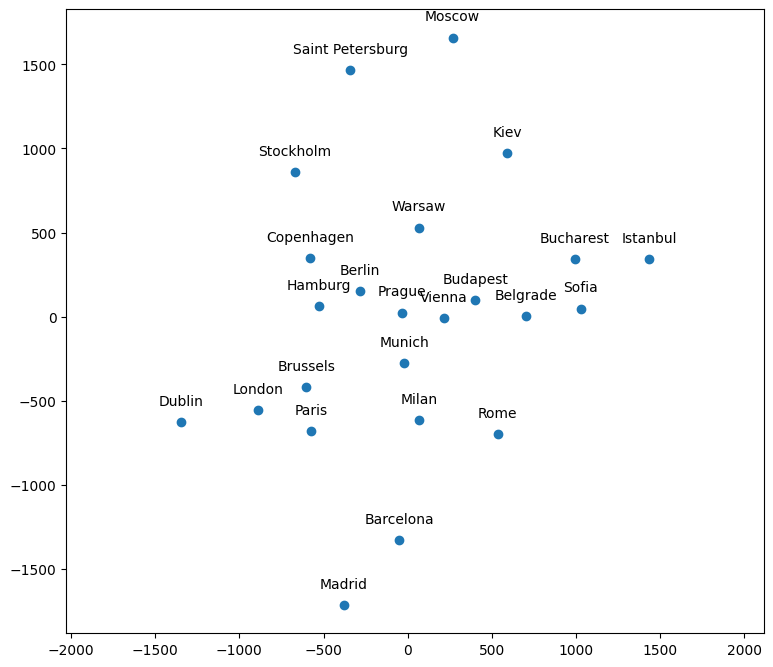

In [6]:
fig = plt.figure(figsize=(9,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1], marker = 'o')
plt.axis('equal')
for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (0, 10),
        textcoords = 'offset points', ha = 'center', va = 'bottom')

plt.show()